      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]
----------------------------------------------------------------------------------------------------
(1338, 7)
(1338,)
----------------------------------------------------------------------------------------------------
1338
<class

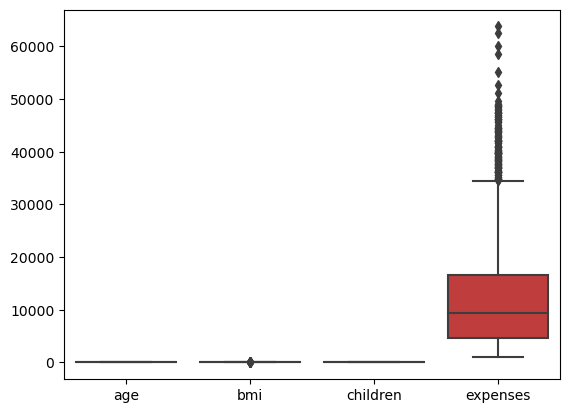

In [61]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Step-1 : Business Problem Understanding

# This project is about the insurance expenses depending on the many factors(input variables) as age of the person, 
# gender, body mass index(bmi), the person have how many childrens, is he smoker or not, and his region of residence.

# We have to identify that for how much insurence expenses will be there depending on the independent variables , means we have to identify the relation between expenses and input variables.


# Step-2 : Data Understanding

# We have to uderstand that how many input variables are there which is the output variable and how many continous, discrete categorical, 
# discrete numerical variables are there in dataset, we have to seperate them.
# Is there any wrong data is there in columns?
# How many unique values are there in each column?
# and so on...
 
df = pd.read_excel("insurance.xlsx")
print(df)
print("-"*100)

print(df.shape)
print(df["age"].shape)
print("-"*100)

print(df["age"].value_counts().sum())
df["sex"].value_counts()
df["bmi"].value_counts()
df["children"].value_counts()
df["smoker"].value_counts()
df["region"].value_counts()
df["expenses"].value_counts()

df["age"].unique()
df["sex"].unique()
df["bmi"].unique()
df["children"].unique()
df["smoker"].unique()
df["region"].unique()
df["expenses"].unique()

print(df.info())
print("-"*100)

#Exploratory Data Analysis:
# we have continous, discrete categorical, discrete numerical variables are there in dataset, we have to seperate them.

continous_vars = ["age","bmi","expenses"]
discrete_categoricals = ["sex","smoker","region"]
discrete_count = ["children"]

print(df.describe())
print("-"*100)

print(df[continous_vars].describe())
print("-"*100)

print(df[discrete_categoricals].describe())
print("-"*100)

print(df[discrete_count].describe())
print("-"*100)

print(df[continous_vars].corr())
print("-"*100)

sns.boxplot(df)
plt.show()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64
----------------------------------------------------------------------------------------------------
1
----------------------------------------------------------------------------------------------------
None (1337, 7)
      age     sex   bmi  children smoker  expenses
0      19  female  27.9         0    yes  16884.92
1      18    male  33.8         1     no   1725.55
2      28    male  33.0         3     no   4449.46
3      33    male  22.7         0     no  21984.47
4      32    male  28.9         0     no   3866.86
...   ...     ...   ...       ...    ...       ...
1333   50    male  31.0         3     no  10600.55
1334   18  female  31.9         0     no   2205.98
1335   18  female  36.9         0     no   1629.83
1336   21  female  25.8         0     no   2007.95
1337   61  female  29.1         0    yes  29141.36

[1337 rows x 6 columns]
---------------------------------

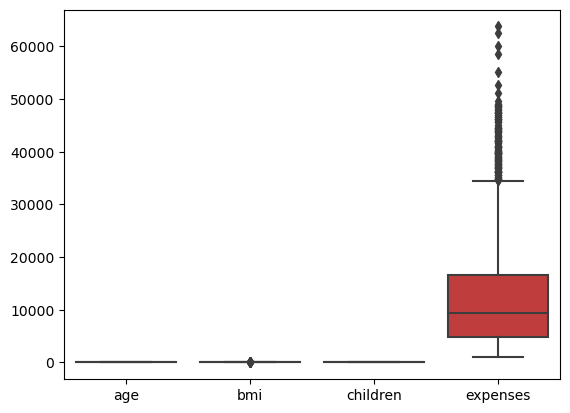

      age  sex   bmi  children  smoker  expenses
0      19    0  27.9         0       1  16884.92
1      18    1  33.8         1       0   1725.55
2      28    1  33.0         3       0   4449.46
3      33    1  22.7         0       0  21984.47
4      32    1  28.9         0       0   3866.86
...   ...  ...   ...       ...     ...       ...
1333   50    1  31.0         3       0  10600.55
1334   18    0  31.9         0       0   2205.98
1335   18    0  36.9         0       0   1629.83
1336   21    0  25.8         0       0   2007.95
1337   61    0  29.1         0       1  29141.36

[1337 rows x 6 columns]


In [62]:
# Step-3 : Data Preprocessing

# Data Cleaning :

print(df.isnull().sum())
print("-"*100)

print(df.duplicated().sum())  # ---> Here, we will get 1 duplicate record, so we should that duplicated record
print("-"*100)

print(df.drop_duplicates(inplace=True),df.shape)  #  ---> It will drop the duplicated record and print new total no. of records in dataset
                                               #  ---> inplace = True , this attribute re-arrange the index of records after dropping records from dataset

# Note: once we drop the duplicated records from the dataset, after that whenever we reload the data if don't use the drop_duplicates() function also, we never get the duplicated records   

# Here we can observe that the 'region' column is not usefull for the model identification, So we should drop the 'region' column
df.drop('region',axis=1,inplace=True)
print(df)
print("-"*100)

sns.boxplot(df)
plt.show()


# Data Wrangling : Here, In the dataset we have discrete categorical columns so we have to convert them into discrete count formate,
                       # So, by using the nominal(dummy) encoding we have to convert discrete categorical into discrete count.
    
# Encoding : 

# Encoding sex column
df["sex"].replace({"female":0,"male":1},inplace=True)  # ---> It will convert the female into 0 & male into 1 in sex column

# Encoding smoker column
df["smoker"].replace({"no":0,"yes":1},inplace=True)    # ---> It will convert the no into 0 & yes into 1 in smoker column

print(df)

In [63]:
# Step-4 : 1) split the data into two parts as train data and test data

X = df.drop('expenses' , axis=1)  # or X = df[["age","sex","bmi","children","smoker"]]
print(X)
print("-"*100)
y = df["expenses"]
print(y)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=9)

      age  sex   bmi  children  smoker
0      19    0  27.9         0       1
1      18    1  33.8         1       0
2      28    1  33.0         3       0
3      33    1  22.7         0       0
4      32    1  28.9         0       0
...   ...  ...   ...       ...     ...
1333   50    1  31.0         3       0
1334   18    0  31.9         0       0
1335   18    0  36.9         0       0
1336   21    0  25.8         0       0
1337   61    0  29.1         0       1

[1337 rows x 5 columns]
----------------------------------------------------------------------------------------------------
0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1337, dtype: float64


In [65]:

# The alpha is very important in model identification. So, we have to first findout the best alpha value for the model.
    
# To find best value of alpha, applying HyperparameterTuning for ElasticNet Regression:

from sklearn.model_selection import GridSearchCV    # GridSearchCV mean within the given list identify best value of cv

from sklearn.linear_model import ElasticNet
estimator = ElasticNet()

# parameters(alphas) & values
param_grid = {"alpha":list(range(1,100)),"l1_ratio":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}   # Here, alpha is key of dictionary(dict) having value as the list of 1 to 99(i.e.[1,2,...,98,99])
    
# Identifying the best value of the paramter(alpha) within the given range of values(i.e. here, 1 to 99) for the given data

model_hp = GridSearchCV(estimator,param_grid,cv=5,scoring='neg_mean_squared_error')  # ---> Here, model_hp will collect the best alpha value
model_hp.fit(X_train,y_train)
model_hp.best_params_      # ---> It will give the best alpha value for best model identification

{'alpha': 45, 'l1_ratio': 1}

In [48]:
# Modelling : 

from sklearn.linear_model import ElasticNet

best_model = ElasticNet(alpha=45,l1_ratio=1)

best_model.fit(X_train,y_train)

print("coefficients:",best_model.coef_)
print("intercept:",best_model.intercept_)

coefficients: [  264.37213484    -0.           317.0408608    373.19599922
 23621.90440143]
intercept: -12045.192067679147


In [31]:
# Step-5 : Prediction : 

ypred_train = best_model.predict(X_train)
print("ypred_train:",ypred_train)
print("-"*100)

ypred_test = best_model.predict(X_test)
print("ypred_test:",ypred_test)
print("-"*100)



ypred_train: [16996.96994294 10361.70376681  5595.24573441 ... 14947.04534922
  7304.90722732 12930.01532185]
----------------------------------------------------------------------------------------------------
ypred_test: [13458.91046247 31300.958854   24724.04457552  8542.36190243
  9506.66795118 30181.45496116 14579.99590249  9688.48808588
 26772.05951141  4668.02914172  2342.42460677 10054.95688939
 13208.64683871  3095.25462693 10674.05657622  7846.13817741
  6721.35646322 10975.11549396 27209.4210912  12327.19380165
  9231.77372233  6938.35639614  4059.56067569 15324.1043597
  2405.88382087  4436.70171383 10247.28520338 11248.38716182
  7884.80273109  5652.93496118  2037.54637336  9219.35588519
 10509.55652595  -143.07495041 12454.11222987 16748.24040296
 11294.19818084 37118.35424869  2226.05537168 37955.53680006
  3837.45342631  5212.58079192  9739.48844902  9927.75136435
  3918.35576634 40151.93767491 31616.30425288 16092.50886179
  9418.41407665  4651.95604425 27692.21811598 

In [32]:
# Evalution :

from sklearn.metrics import mean_absolute_error
MAE_train = mean_absolute_error(y_train,ypred_train)
print("MAE_train:",MAE_train)
MAE_test = mean_absolute_error(y_test,ypred_test)
print("MAE_test:",MAE_test)
print("-"*100)

from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train,ypred_train)
print("MSE_train:",MSE_train)
MSE_test = mean_squared_error(y_test,ypred_test)
print("MSE_test:",MSE_test)
print("-"*100)

RMSE_train = np.sqrt(MSE_train)
print("RMSE_train:",RMSE_train)
RMSE_test = np.sqrt(MSE_test)
print("RMSE_test:",RMSE_test)
print("-"*100)

r2_train = best_model.score(X_train,y_train)
print("r2_train:",r2_train)
r2_test = best_model.score(X_test,y_test)
print("r2_test:",r2_test)
print("-"*100)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model,X_train,y_train,cv=5)
print(scores)
print("cross_validation_score:",scores.mean())

MAE_train: 4203.345994439332
MAE_test: 4134.765561196854
----------------------------------------------------------------------------------------------------
MSE_train: 36550937.84463511
MSE_test: 37430000.07975997
----------------------------------------------------------------------------------------------------
RMSE_train: 6045.7371630459675
RMSE_test: 6118.0062176954325
----------------------------------------------------------------------------------------------------
r2_train: 0.7592721687983452
r2_test: 0.7008373661584879
----------------------------------------------------------------------------------------------------
[0.73736122 0.81620647 0.81595727 0.72911727 0.66996037]
cross_validation_score: 0.753720520261007


In [52]:
# Step-6 : Final Model Selection

# Here we can observe that the L1-Regularization has 100% in ElasticNet Regression, means L2-Regulation has 0%.
# So, L2-Regularization is not usefull here.

# In ElasticNet Regression we can identify the useless column by Lasso Regression using coefficient's value, 
# if the coefficient is equal to zero means the column multiple of that coefficient becomes zero(becomes useless) in model identification

# By observing modelling we can say that the coefficient of 2nd column(i.e. sex column) is zero.
# That means the sex column is useless(become zero) for model selection(identification)
# So, we should drop the sex column to get more model accuray(to get best model)

print(df.drop('sex',axis=1))
print("-"*100)

X = df[["age","bmi","children","smoker"]]
print(X)
print("-"*100)

y = df["expenses"]
print(y)
print("-"*100)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=9)

from sklearn.linear_model import ElasticNet

final_model = ElasticNet(alpha=45,l1_ratio=1)

final_model.fit(X_train,y_train)

print("coefficients:",final_model.coef_)
print("intercept:",final_model.intercept_)

from sklearn.metrics import mean_absolute_error
MAE_train = mean_absolute_error(y_train,ypred_train)
print("MAE_train:",MAE_train)
MAE_test = mean_absolute_error(y_test,ypred_test)
print("MAE_test:",MAE_test)
print("-"*100)

from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train,ypred_train)
print("MSE_train:",MSE_train)
MSE_test = mean_squared_error(y_test,ypred_test)
print("MSE_test:",MSE_test)
print("-"*100)

RMSE_train = np.sqrt(MSE_train)
print("RMSE_train:",RMSE_train)
RMSE_test = np.sqrt(MSE_test)
print("RMSE_test:",RMSE_test)
print("-"*100)

r2_train = final_model.score(X_train,y_train)
print("r2_train:",r2_train)
r2_test = final_model.score(X_test,y_test)
print("r2_test:",r2_test)
print("-"*100)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(final_model,X_train,y_train,cv=5)
print(scores)
print("cross_validation_score:",scores.mean())

      age   bmi  children  smoker  expenses
0      19  27.9         0       1  16884.92
1      18  33.8         1       0   1725.55
2      28  33.0         3       0   4449.46
3      33  22.7         0       0  21984.47
4      32  28.9         0       0   3866.86
...   ...   ...       ...     ...       ...
1333   50  31.0         3       0  10600.55
1334   18  31.9         0       0   2205.98
1335   18  36.9         0       0   1629.83
1336   21  25.8         0       0   2007.95
1337   61  29.1         0       1  29141.36

[1337 rows x 5 columns]
----------------------------------------------------------------------------------------------------
      age   bmi  children  smoker
0      19  27.9         0       1
1      18  33.8         1       0
2      28  33.0         3       0
3      33  22.7         0       0
4      32  28.9         0       0
...   ...   ...       ...     ...
1333   50  31.0         3       0
1334   18  31.9         0       0
1335   18  36.9         0       0
1336  

In [55]:
# Step-7 : Prediction on new data by using identified model

new_data = {"age":35, "sex":"male", "bmi":31.4, "children":5, "smoker": "yes", "region":"southeast"}

df_test = pd.DataFrame(new_data, index = [0])
print(df_test)
print("-"*100)

df_test.drop(['region','sex'],axis=1,inplace=True)

df_test["smoker"].replace({"no":0,"yes":1},inplace=True)  

print(df_test)

ypred_new_data = final_model.predict(df_test) 
print("ypred_new_data :",ypred_new_data)

   age   sex   bmi  children smoker     region
0   35  male  31.4         5    yes  southeast
----------------------------------------------------------------------------------------------------
   age   bmi  children  smoker
0   35  31.4         5       1
ypred_new_data : [32757.36521377]


In [57]:
# The identified model is as:

# ypred = 264.42686138*(age) + 317.29616946*(bmi) + 382.62400488*(children) + 23710.44401562)*(smoker) + (-12084.238695468788)

ypred = 264.42686138*35 + 317.29616946*31.4 + 382.62400488*5 + 23710.44401562*1 + (-12084.238695468788)

print("ypred:",ypred)

ypred: 32757.36521389521
